In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [235]:
df = pd.read_csv(r'C:\Users\HP\Desktop\ML Project\stockmodel\files\ADANIPORTS.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [152]:
df['prev_open'] = df['Open'].shift(1)
df['prev_high'] = df['High'].shift(1)
df['prev_low'] = df['Low'].shift(1)
df['prev_close'] = df['Close'].shift(1)
df['prev_volume'] = df['Volume'].shift(1)

df['target'] = (df['Close'].shift(-1) - df['Close']) / df['Close'] * 100



In [153]:
# Moving averages
df['SMA_5'] = df['Close'].rolling(5).mean()
df['SMA_10'] = df['Close'].rolling(10).mean()

# Exponential moving average
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()

# Price change and returns
df['Return'] = df['Close'].pct_change()

# Volatility
df['Volatility'] = df['Return'].rolling(5).std()


In [154]:
df = df.dropna()

In [155]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,prev_high,prev_low,prev_close,prev_volume,target,SMA_5,SMA_10,EMA_10,Return,Volatility
866,2011-06-01,MUNDRAPORT,EQ,161.45,162.10,165.70,161.25,163.50,164.00,164.08,...,165.90,155.05,161.45,20663159.0,-1.676829,157.12,153.390,154.130393,0.015794,0.019910
867,2011-06-02,MUNDRAPORT,EQ,164.00,164.00,165.15,160.15,161.15,161.25,162.17,...,165.70,161.25,164.00,2574106.0,-0.124031,158.99,155.095,155.424867,-0.016768,0.020004
868,2011-06-03,MUNDRAPORT,EQ,161.25,161.50,162.80,159.20,161.00,161.05,161.02,...,165.15,160.15,161.25,1699298.0,-0.745110,160.67,156.405,156.447619,-0.001240,0.020740
869,2011-06-06,MUNDRAPORT,EQ,161.05,160.50,161.10,159.05,160.00,159.85,160.09,...,162.80,159.20,161.05,1185817.0,-1.626525,161.52,157.400,157.066233,-0.007451,0.021478
870,2011-06-07,MUNDRAPORT,EQ,159.85,159.85,162.75,156.35,157.00,157.25,158.52,...,161.10,159.05,159.85,546378.0,-1.494436,160.68,157.945,157.099646,-0.016265,0.013396


Text(0.5, 1.0, 'Stock Price Over Time')

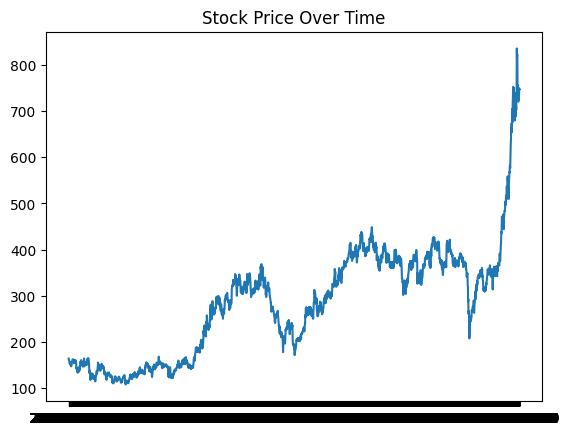

In [156]:
plt.plot(df['Date'], df['Close'])
plt.title("Stock Price Over Time")


In [157]:
x = df[['prev_open', 'prev_high', 'prev_low', 'prev_close', 'prev_volume', 'SMA_5', 'SMA_10', 'EMA_10', 'Return', 'Volatility']]
y = df['target']

In [158]:
train_size = int(len(df) * 0.8)
x_train, x_test = x.iloc[:train_size], x.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


In [159]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [160]:
lr.score(x_test, y_test)*100,lr.score(x_train, y_train)*100

(-3.2301851645165636, 0.8240896612810689)

In [161]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200)
rf.fit(x_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [162]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=4)
gb.fit(x_train, y_train)

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


In [163]:
rf.score(x_test, y_test)*100,rf.score(x_train, y_train)*100


(-8.852398300537544, 85.03838428015528)

In [164]:
gb.score(x_test, y_test)*100,gb.score(x_train, y_train)*100

(-10.757140146155496, 36.05015511029652)

In [187]:
df['prev_open'] = df['Open'].shift(1)
df['prev_high'] = df['High'].shift(1)
df['prev_low'] = df['Low'].shift(1)
df['prev_close'] = df['Close'].shift(1)
df['prev_volume'] = df['Volume'].shift(1)

df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


In [188]:
df = df.dropna()

In [189]:
x = df[['prev_open', 'prev_high', 'prev_low', 'prev_close', 'prev_volume', 'SMA_5', 'SMA_10', 'EMA_10', 'Return', 'Volatility']]
y = df['target']

In [190]:
train_size = int(len(df) * 0.8)
x_train, x_test = x.iloc[:train_size], x.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [212]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1)
rfc.fit(x_train, y_train)

,n_estimators,1
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [227]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=5, learning_rate=0.05, max_depth=4)
gbc.fit(x_train, y_train)

,loss,'log_loss'
,learning_rate,0.05
,n_estimators,5
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


In [225]:
rfc.score(x_test, y_test)*100,rfc.score(x_train, y_train)*100

(49.69199178644764, 82.94812532100667)

In [228]:
gbc.score(x_test, y_test)*100,gbc.score(x_train, y_train)*100

(52.56673511293635, 57.781201848998464)

In [222]:
for i in range(1,10):
    knn1 = RandomForestClassifier(n_estimators=i)
    knn1.fit(x_train,y_train)
    print(i,knn1.score(x_train,y_train)*100,knn1.score(x_test,y_test)*100)

1 82.53723677452491 52.56673511293635
2 81.35593220338984 47.84394250513347
3 90.85772984078069 48.870636550308014
4 89.72778633795583 50.10266940451745
5 94.40164355418594 49.69199178644764
6 94.50436569080637 49.69199178644764
7 96.61016949152543 54.62012320328542
8 97.17514124293785 51.74537987679672
9 97.89419619928094 51.74537987679672


In [223]:
for i in range(1,10):
    knn1 = GradientBoostingClassifier(n_estimators=i)
    knn1.fit(x_train,y_train)
    print(i,knn1.score(x_train,y_train)*100,knn1.score(x_test,y_test)*100)

1 50.89881869542886 53.59342915811089
2 55.1617873651772 52.56673511293635
3 55.82948125321007 53.59342915811089
4 55.82948125321007 54.20944558521561
5 56.34309193631227 54.20944558521561
6 56.908063687724706 54.00410677618069
7 56.95942475603493 51.95071868583162
8 57.11350796096559 48.459958932238195
9 57.11350796096559 48.25462012320328


In [229]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import numpy as np

tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(gb, x, y, cv=tscv, scoring='accuracy')
print("CV Accuracy scores:", scores)
print("Average:", np.mean(scores))


CV Accuracy scores: [0.5037037  0.50617284 0.49135802 0.4617284  0.50123457]
Average: 0.4928395061728395


In [231]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = gbc.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[102 134]
 [ 97 154]]
              precision    recall  f1-score   support

           0       0.51      0.43      0.47       236
           1       0.53      0.61      0.57       251

    accuracy                           0.53       487
   macro avg       0.52      0.52      0.52       487
weighted avg       0.52      0.53      0.52       487

